<a href="https://colab.research.google.com/github/dipucriodigital/ciencia-de-dados-e-analytics/blob/main/machine-learning/ML_Aula3b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Machine Learning - Lucivania Costa
## Modelo Colab Aprendizado supervisionado


## Configuração do ambiente

In [2]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Imports necessários
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

## Carga do Dataset
O dataset foi adquirido no link https://archive.ics.uci.edu/dataset/186/wine+quality

Este conjunto de dados possui informações físico-químicas para determinar classificação de vinhos de 0 a 10 para garantir sua qualidade. Os dados são desbalanceados, por isso utilizamos o método SMOTE para realizar oversampling.

### Informações adicionais
Os dois conjuntos de dados estão relacionados às variantes tintas e brancas do vinho português "Vinho Verde". Para mais detalhes, consulte: http://www.vinhoverde.pt/en/ ou a referência [Cortez et al., 2009]. Devido a questões de privacidade e logística, apenas variáveis físico-químicas (entradas) e sensoriais (a saída) estão disponíveis (por exemplo, não há dados sobre tipos de uva, marca do vinho, preço de venda do vinho, etc.).

Esses conjuntos de dados podem ser vistos como tarefas de classificação ou regressão. As classes são ordenadas e não balanceadas (por exemplo, há muito mais vinhos normais do que excelentes ou ruins). Algoritmos de detecção de outliers poderiam ser usados para identificar os poucos vinhos excelentes ou ruins.

### Glossário das características do dataset
fixed_acidity - acidez fixa

volatile_acidity - acidez volátil

citric_acid - ácido cítrico

residual_sugar - açúcar residual

chlorides - clorídeos

free_sulfur_dioxide - Dióxido sulfúrico livre

total_sulfur_dioxide - Dióxido sulfúrico total

density - densidade

pH - pH

sulphates - sulfatos

alcohol - álcool

quality - qualidade (saída - 0 a 10)


### Número de instâncias
4898

### Número de características (informações de input)
11





In [3]:
# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/LucyEster/geovisioapp/master/project/winedataset.csv"

# Lê o arquivo 
dataset = pd.read_csv(url, delimiter=';')

# Mostra as primeiras linhas do dataset
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


## Separação em conjunto de treino e conjunto de teste com holdout

In [6]:
test_size = 0.30 # tamanho do conjunto de teste
seed = 5 # semente aleatória

# Separação em conjuntos de treino e teste
array = dataset.values
X = array[:,:-1]
label_encoder = LabelEncoder()
result_labels = array[:,-1]
y = label_encoder.fit_transform(result_labels)


X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y) # holdout com estratificação

#criando instancia do SMOTE
smote = SMOTE()

#balanceando os dados
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Parâmetros e partições da validação cruzada
scoring = 'accuracy'
num_particoes = 10
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed) # validação cruzada com estratificação

## Modelagem e Inferência

### Criação e avaliação de modelos: linha base

LR: 0.560119 (0.025108)
KNN: 0.697417 (0.025459)
CART: 0.785482 (0.026111)
NB: 0.546128 (0.026820)
SVM: 0.445134 (0.025532)
Bagging: 0.839976 (0.020275)
RF: 0.861636 (0.017627)
ET: 0.870377 (0.018143)
Ada: 0.303292 (0.009949)
GB: 0.814822 (0.015854)
Voting: 0.634900 (0.028797)


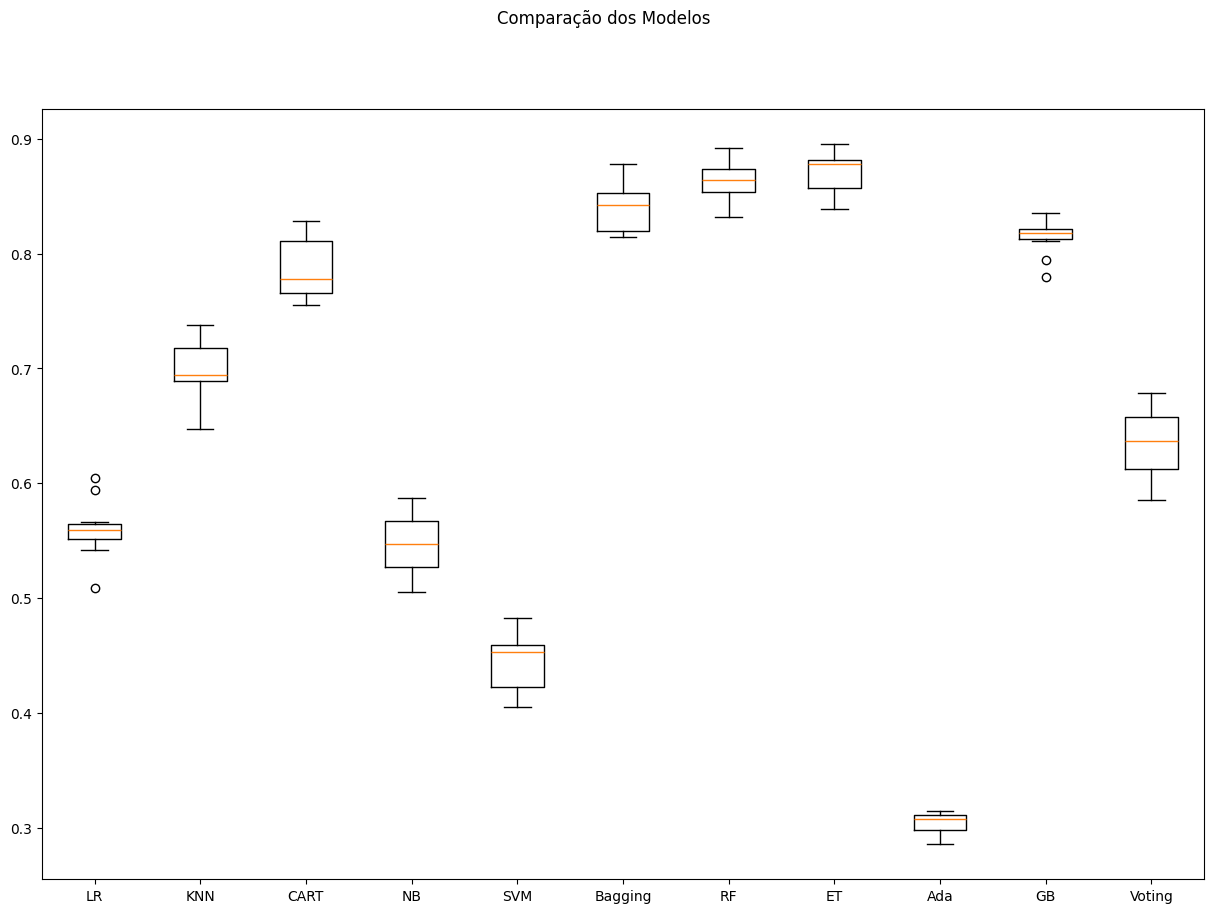

In [33]:
np.random.seed(5) # definindo uma semente global

# Lista que armazenará os modelos
models = []

# Criando os modelos e adicionando-os na lista de modelos
models.append(('LR', LogisticRegression(max_iter=200))) 
models.append(('KNN', KNeighborsClassifier())) 
models.append(('CART', DecisionTreeClassifier())) 
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Definindo os parâmetros do classificador base para o BaggingClassifier
base = DecisionTreeClassifier()
num_trees = 100
max_features = 3

# Criando os modelos para o VotingClassifier
bases = []
model1 = LogisticRegression(max_iter=200)
bases.append(('logistic', model1))
model2 = DecisionTreeClassifier()
bases.append(('cart', model2))
model3 = SVC()
bases.append(('svm', model3))

# Criando os ensembles e adicionando-os na lista de modelos
models.append(('Bagging', BaggingClassifier(estimator=base, n_estimators=num_trees)))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('Ada', AdaBoostClassifier(n_estimators=num_trees)))
models.append(('GB', GradientBoostingClassifier(n_estimators=num_trees)))
models.append(('Voting', VotingClassifier(bases)))

# Listas para armazenar os resultados
results = []
names = []

# Avaliação dos modelos (treinamento)
for name, model in models:
    cv_results = cross_val_score(model, X_resampled, y_resampled, cv=kfold, scoring=scoring)
    results.append(cv_results)
    
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(15,10)) 
fig.suptitle('Comparação dos Modelos') 
ax = fig.add_subplot(111) 
plt.boxplot(results) 
ax.set_xticklabels(names) 
plt.show()

### Criação e avaliação de modelos: dados padronizados e normalizados


LR-orig: 0.560 (0.025)
KNN-orig: 0.697 (0.025)
CART-orig: 0.785 (0.026)
NB-orig: 0.546 (0.027)
SVM-orig: 0.445 (0.026)
Bag-orig: 0.840 (0.020)
RF-orig: 0.862 (0.018)
ET-orig: 0.870 (0.018)
Ada-orig: 0.303 (0.010)
GB-orig: 0.815 (0.016)
Vot-orig: 0.635 (0.029)
LR-padr: 0.653 (0.023)
KNN-padr: 0.778 (0.022)
CART-padr: 0.785 (0.026)
NB-padr: 0.544 (0.024)
SVM-padr: 0.774 (0.014)
Bag-padr: 0.847 (0.024)
RF-padr: 0.859 (0.016)
ET-padr: 0.872 (0.016)
Ada-padr: 0.303 (0.010)
GB-padr: 0.815 (0.015)
Vot-padr: 0.768 (0.025)
LR-norm: 0.597 (0.020)
KNN-norm: 0.769 (0.022)
CART-norm: 0.785 (0.027)
NB-norm: 0.544 (0.024)
SVM-norm: 0.728 (0.018)
Bag-norm: 0.842 (0.024)
RF-norm: 0.860 (0.017)
ET-norm: 0.873 (0.018)
Ada-norm: 0.303 (0.010)
GB-norm: 0.814 (0.015)
Vot-norm: 0.726 (0.021)


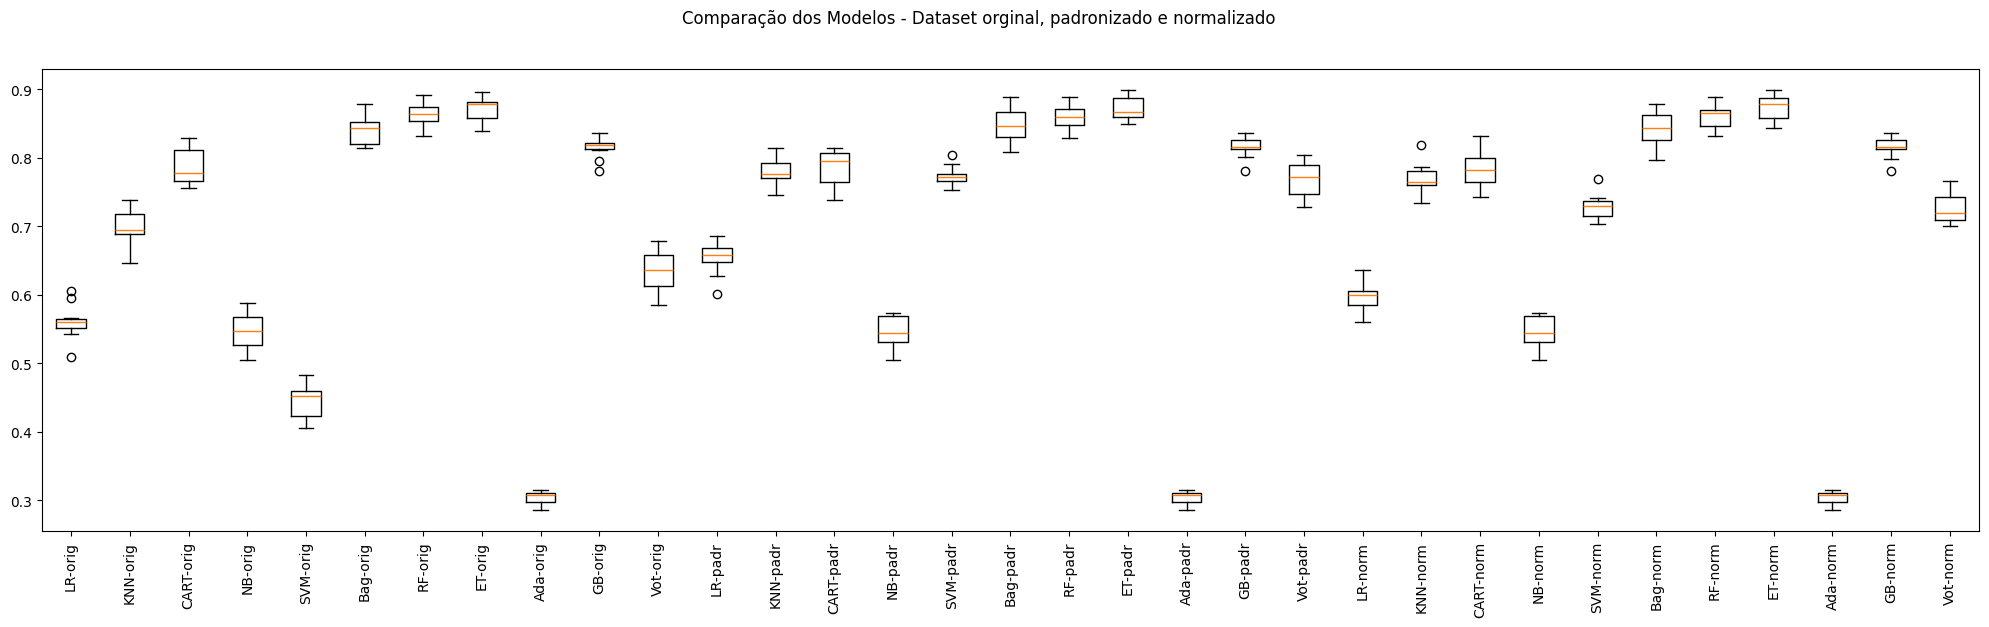

In [34]:
np.random.seed(5) # definindo uma semente global para este bloco

# Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []


# Criando os elementos do pipeline

# Algoritmos que serão utilizados
reg_log = ('LR', LogisticRegression(max_iter=200))
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())
bagging = ('Bag', BaggingClassifier(estimator=base, n_estimators=num_trees))
random_forest = ('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features))
extra_trees = ('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features))
adaboost = ('Ada', AdaBoostClassifier(n_estimators=num_trees))
gradient_boosting = ('GB', GradientBoostingClassifier(n_estimators=num_trees))
voting = ('Voting', VotingClassifier(bases))

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())


# Montando os pipelines
# A ordem de execução é da esquerda para a direita.

# Dataset original
pipelines.append(('LR-orig', Pipeline([reg_log]))) 
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))
pipelines.append(('Bag-orig', Pipeline([bagging])))
pipelines.append(('RF-orig', Pipeline([random_forest])))
pipelines.append(('ET-orig', Pipeline([extra_trees])))
pipelines.append(('Ada-orig', Pipeline([adaboost])))
pipelines.append(('GB-orig', Pipeline([gradient_boosting])))
pipelines.append(('Vot-orig', Pipeline([voting])))

# Dataset Padronizado
pipelines.append(('LR-padr', Pipeline([standard_scaler, reg_log]))) 
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))
pipelines.append(('Bag-padr', Pipeline([standard_scaler, bagging]))) 
pipelines.append(('RF-padr', Pipeline([standard_scaler, random_forest])))
pipelines.append(('ET-padr', Pipeline([standard_scaler, extra_trees])))
pipelines.append(('Ada-padr', Pipeline([standard_scaler, adaboost])))
pipelines.append(('GB-padr', Pipeline([standard_scaler, gradient_boosting])))
pipelines.append(('Vot-padr', Pipeline([standard_scaler, voting])))

# Dataset Normalizado
pipelines.append(('LR-norm', Pipeline([min_max_scaler, reg_log]))) 
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))
pipelines.append(('Bag-norm', Pipeline([min_max_scaler, bagging]))) 
pipelines.append(('RF-norm', Pipeline([min_max_scaler, random_forest])))
pipelines.append(('ET-norm', Pipeline([min_max_scaler, extra_trees])))
pipelines.append(('Ada-norm', Pipeline([min_max_scaler, adaboost])))
pipelines.append(('GB-norm', Pipeline([min_max_scaler, gradient_boosting])))
pipelines.append(('Vot-norm', Pipeline([min_max_scaler, voting])))

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_resampled, y_resampled, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado') 
ax = fig.add_subplot(111) 
plt.boxplot(results) 
ax.set_xticklabels(names, rotation=90)
plt.show()

In [37]:
## Resultados da célula anterior

# Melhores: ET-orig: 0.870 (0.018) Bag-padr: 0.847 (0.024) ET-padr: 0.872 (0.016) RF-padr: 0.859 (0.016) Bag-norm: 0.842 (0.024) RF-norm: 0.860 (0.017) ET-norm: 0.873 (0.018)

#LR-orig: 0.560 (0.025)
#KNN-orig: 0.697 (0.025)
#CART-orig: 0.785 (0.026)
#NB-orig: 0.546 (0.027)
#SVM-orig: 0.445 (0.026)
#Bag-orig: 0.840 (0.020)
#RF-orig: 0.862 (0.018)
#ET-orig: 0.870 (0.018)
#Ada-orig: 0.303 (0.010)
#GB-orig: 0.815 (0.016)
#Vot-orig: 0.635 (0.029)
#LR-padr: 0.653 (0.023)
#KNN-padr: 0.778 (0.022)
#CART-padr: 0.785 (0.026)
#NB-padr: 0.544 (0.024)
#SVM-padr: 0.774 (0.014)
#Bag-padr: 0.847 (0.024)
#RF-padr: 0.859 (0.016)
#ET-padr: 0.872 (0.016)
#Ada-padr: 0.303 (0.010)
#GB-padr: 0.815 (0.015)
#Vot-padr: 0.768 (0.025)
#LR-norm: 0.597 (0.020)
#KNN-norm: 0.769 (0.022)
#CART-norm: 0.785 (0.027)
#NB-norm: 0.544 (0.024)
#SVM-norm: 0.728 (0.018)
#Bag-norm: 0.842 (0.024)
#RF-norm: 0.860 (0.017)
#ET-norm: 0.873 (0.018)
#Ada-norm: 0.303 (0.010)
#GB-norm: 0.814 (0.015)
#Vot-norm: 0.726 (0.021)


### Otimização dos hiperparâmetros

In [38]:
np.random.seed(5)  # Definindo uma semente global para este bloco

# Lista de modelos
models = []

# Criando os modelos e adicionando-os na lista de modelos
models.append(('LR', LogisticRegression(max_iter=200))) 
models.append(('KNN', KNeighborsClassifier())) 
models.append(('CART', DecisionTreeClassifier())) 

# Definindo os parâmetros do classificador base para o BaggingClassifier
base = DecisionTreeClassifier()
num_trees = 10
max_features = 3


# Criando os ensembles e adicionando-os na lista de modelos
models.append(('Bagging', BaggingClassifier(estimator=base, n_estimators=num_trees)))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('GB', GradientBoostingClassifier(n_estimators=num_trees)))

# Definindo os componentes do pipeline
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

# Lista de pipelines
pipelines = []

# Criando pipelines para cada modelo
for name, model in models:
    pipelines.append((name + '-orig', Pipeline(steps=[(name, model)])))
    pipelines.append((name + '-padr', Pipeline(steps=[standard_scaler, (name, model)])))
    pipelines.append((name + '-norm', Pipeline(steps=[min_max_scaler, (name, model)])))

# Definindo os parâmetros para GridSearchCV. Alguns algoritmos com performance menor foram removidos do GS.
param_grids = {
    'LR': {
        'LR__C': [0.01, 0.1, 1, 10, 100],
        'LR__solver': ['liblinear', 'saga']
    },
    'KNN': {
        'KNN__n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21],
        'KNN__metric': ["euclidean", "manhattan", "minkowski"]
    },
    'CART': {
        'CART__max_depth': [None, 10, 20, 30, 40, 50],
        'CART__min_samples_split': [2, 5, 10],
        'CART__min_samples_leaf': [1, 2, 4]
    },
    'RF': {
        'RF__n_estimators': [10, 50, 100, 200],
        'RF__max_features': ['auto', 'sqrt', 'log2'],
        'RF__max_depth': [None, 10, 20, 30],
        'RF__min_samples_split': [2, 5, 10],
        'RF__min_samples_leaf': [1, 2, 4]
    },
    'ET': {
        'ET__n_estimators': [10, 50, 100, 200],
        'ET__max_features': ['auto', 'sqrt', 'log2'],
        'ET__max_depth': [None, 10, 20, 30],
        'ET__min_samples_split': [2, 5, 10],
        'ET__min_samples_leaf': [1, 2, 4]
    },
    'GB': {
        'GB__n_estimators': [10, 50, 100, 200],
        'GB__learning_rate': [0.01, 0.1, 0.2, 0.3],
        'GB__max_depth': [3, 5, 7, 9]
    }
}

# Parâmetros de cross-validation e scoring
scoring = 'accuracy'
kfold = 5

# Executando o GridSearchCV para cada pipeline
for name, pipeline in pipelines:
    model_type = name.split('-')[0]
    if model_type in param_grids:
        param_grid = param_grids[model_type]
    else:
        param_grid = {}  # Para modelos que não têm parâmetros definidos

    grid = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid.fit(X_resampled, y_resampled)
    # Imprimindo a melhor configuração
    print("Modelo: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))
    
#It took 254min


Modelo: LR-orig - Melhor: 0.617407 usando {'LR__C': 10, 'LR__solver': 'liblinear'}
Modelo: LR-padr - Melhor: 0.650591 usando {'LR__C': 100, 'LR__solver': 'saga'}
Modelo: LR-norm - Melhor: 0.647100 usando {'LR__C': 100, 'LR__solver': 'saga'}
Modelo: KNN-orig - Melhor: 0.802933 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 1}
Modelo: KNN-padr - Melhor: 0.853597 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 1}
Modelo: KNN-norm - Melhor: 0.850103 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 1}
Modelo: CART-orig - Melhor: 0.766952 usando {'CART__max_depth': None, 'CART__min_samples_leaf': 1, 'CART__min_samples_split': 2}
Modelo: CART-padr - Melhor: 0.766948 usando {'CART__max_depth': 20, 'CART__min_samples_leaf': 1, 'CART__min_samples_split': 2}
Modelo: CART-norm - Melhor: 0.762410 usando {'CART__max_depth': 20, 'CART__min_samples_leaf': 1, 'CART__min_samples_split': 2}
Modelo: Bagging-orig - Melhor: 0.808880 usando {}
Modelo: Bagging-padr - Melhor: 0.817965 u

In [ ]:
# Levou 248 min - Modelo: ET-orig - Melhor: 0.870023 usando {'ET__max_depth': 30, 'ET__max_features': 'log2', 'ET__min_samples_leaf': 1, 'ET__min_samples_split': 2, 'ET__n_estimators': 200}

#Modelo: LR-orig - Melhor: 0.617407 usando {'LR__C': 10, 'LR__solver': 'liblinear'}
#Modelo: LR-padr - Melhor: 0.650591 usando {'LR__C': 100, 'LR__solver': 'saga'}
#Modelo: LR-norm - Melhor: 0.647100 usando {'LR__C': 100, 'LR__solver': 'saga'}
#Modelo: KNN-orig - Melhor: 0.802933 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 1}
#Modelo: KNN-padr - Melhor: 0.853597 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 1}
#Modelo: KNN-norm - Melhor: 0.850103 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 1}
#Modelo: CART-orig - Melhor: 0.766952 usando {'CART__max_depth': None, 'CART__min_samples_leaf': 1, 'CART__min_samples_split': 2}
#Modelo: CART-padr - Melhor: 0.766948 usando {'CART__max_depth': 20, 'CART__min_samples_leaf': 1, 'CART__min_samples_split': 2}
#Modelo: CART-norm - Melhor: 0.762410 usando {'CART__max_depth': 20, 'CART__min_samples_leaf': 1, 'CART__min_samples_split': 2}
#Modelo: Bagging-orig - Melhor: 0.808880 usando {}
#Modelo: Bagging-padr - Melhor: 0.817965 usando {}
#Modelo: Bagging-norm - Melhor: 0.811319 usando {}
#Modelo: RF-orig - Melhor: 0.857092 usando {'RF__max_depth': None, 'RF__max_features': 'log2', 'RF__min_samples_leaf': 1, 'RF__min_samples_split': 2, 'RF__n_estimators': 200}
#Modelo: RF-padr - Melhor: 0.858491 usando {'RF__max_depth': 20, 'RF__max_features': 'sqrt', 'RF__min_samples_leaf': 1, 'RF__min_samples_split': 2, 'RF__n_estimators': 200}
#Modelo: RF-norm - Melhor: 0.858840 usando {'RF__max_depth': None, 'RF__max_features': 'sqrt', 'RF__min_samples_leaf': 1, 'RF__min_samples_split': 2, 'RF__n_estimators': 200}
#Modelo: ET-orig - Melhor: 0.870023 usando {'ET__max_depth': 30, 'ET__max_features': 'log2', 'ET__min_samples_leaf': 1, 'ET__min_samples_split': 2, 'ET__n_estimators': 200}
#Modelo: ET-padr - Melhor: 0.867926 usando {'ET__max_depth': None, 'ET__max_features': 'log2', 'ET__min_samples_leaf': 1, 'ET__min_samples_split': 5, 'ET__n_estimators': 200}
#Modelo: ET-norm - Melhor: 0.866879 usando {'ET__max_depth': None, 'ET__max_features': 'sqrt', 'ET__min_samples_leaf': 1, 'ET__min_samples_split': 2, 'ET__n_estimators': 200}
#Modelo: GB-orig - Melhor: 0.866186 usando {'GB__learning_rate': 0.3, 'GB__max_depth': 5, 'GB__n_estimators': 200}
#Modelo: GB-padr - Melhor: 0.865138 usando {'GB__learning_rate': 0.2, 'GB__max_depth': 5, 'GB__n_estimators': 200}
#Modelo: GB-norm - Melhor: 0.863390 usando {'GB__learning_rate': 0.3, 'GB__max_depth': 9, 'GB__n_estimators': 200}

In [7]:
# Tuning do ET

np.random.seed(5) # definindo uma semente global para este bloco

pipelines = []
num_trees = 10
max_features = 3

# Definindo os componentes do pipeline
et_classifier = ('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features))
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

pipelines.append(('ET-orig', Pipeline(steps=[et_classifier])))
pipelines.append(('ET-padr', Pipeline(steps=[standard_scaler, et_classifier])))
pipelines.append(('ET-norm', Pipeline(steps=[min_max_scaler, et_classifier])))

param_grid = {
        'ET__n_estimators': [200, 300, 400],
        'ET__max_features': ['log2'],
        'ET__max_depth': [30, 40, 50],
        'ET__min_samples_split': [2],
        'ET__min_samples_leaf': [1]
    }

# Prepara e executa o GridSearchCV
for name, model in pipelines:    
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid.fit(X_resampled, y_resampled)
    # imprime a melhor configuração
    print("Sem tratamento de missings: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_)) 

Sem tratamento de missings: ET-orig - Melhor: 0.877370 usando {'ET__max_depth': 30, 'ET__max_features': 'log2', 'ET__min_samples_leaf': 1, 'ET__min_samples_split': 2, 'ET__n_estimators': 400}
Sem tratamento de missings: ET-padr - Melhor: 0.879813 usando {'ET__max_depth': 30, 'ET__max_features': 'log2', 'ET__min_samples_leaf': 1, 'ET__min_samples_split': 2, 'ET__n_estimators': 300}
Sem tratamento de missings: ET-norm - Melhor: 0.877021 usando {'ET__max_depth': 30, 'ET__max_features': 'log2', 'ET__min_samples_leaf': 1, 'ET__min_samples_split': 2, 'ET__n_estimators': 300}


## Finalização do Modelo

In [8]:
# Avaliação do modelo com o conjunto de testes
# Melhor modelo
# ET-orig - Melhor: 0.872120 usando {'ET__max_depth': 40, 'ET__max_features': 'log2', 'ET__min_samples_leaf': 1, 'ET__min_samples_split': 2, 'ET__n_estimators': 300}

np.random.seed(5)

# Preparação do modelo

model = ExtraTreesClassifier(n_estimators=300, 
                               max_features='log2',
                               min_samples_split=2,
                               max_depth=40,
                               min_samples_leaf=1)
model.fit(X_resampled, y_resampled)

# Estimativa da acurácia no conjunto de teste

predictions = model.predict(X_test)
print(accuracy_score(y_test, predictions))

0.64375


Rodando o modelo a partir de um pipeline com os hiperparâmetros otimizados.

In [9]:
# Avaliação do modelo com o conjunto de testes
# Melhor modelo
# ET-orig - Melhor: 0.872120 usando {'ET__max_depth': 40, 'ET__max_features': 'log2', 'ET__min_samples_leaf': 1, 'ET__min_samples_split': 2, 'ET__n_estimators': 300}

np.random.seed(5)

# Preparação do modelo

model = ExtraTreesClassifier(n_estimators=300, 
                               max_features='log2',
                               min_samples_split=2,
                               max_depth=40,
                               min_samples_leaf=1)
model.fit(X_resampled, y_resampled)

# Estimativa da acurácia no conjunto de teste

predictions = model.predict(X_test)
print(accuracy_score(y_test, predictions))

0.64375


## Salvando os arquivos

In [10]:
# Salvando o modelo
model_filename = 'et_wine_classifier.pkl'
with open("../models/"+model_filename, 'wb') as file:
    pickle.dump(model, file)
    
# Salvando X_test e y_test
X_test_df = pd.DataFrame(X_test, columns=dataset.columns[:-1])
y_test_df = pd.DataFrame(y_test, columns=[dataset.columns[-1]])
X_test_df.to_csv("../data/X_test_dataset_wine.csv", index=False)
y_test_df.to_csv("../data/y_test_dataset_wine.csv", index=False)


## Simulando a aplicação do modelo em dados não vistos

In [11]:
# Preparação do modelo com TODO o dataset

model.fit(X, y)

ExtraTreesClassifier(max_depth=40, max_features='log2', n_estimators=300)

In [14]:
# Novos dados - não sabemos a classe!

data = {'fixed acidity':  [6.5, 6.6, 5.4],
        'volatile acidity': [0.54, 0.34, 0.70],
        'citric acid': [0.1, 0.02, 0.09],
        'residual sugar': [1.9, 2.2, 2.9],
        'chlorides': [0.087, 0.076, 0.089],
        'free sulfur dioxide': [16, 17, 12],
        'total sulfur dioxide':[66, 63, 69],
        'density': [0.9989, 0.09854, 0.08798],
        'pH': [3.16, 3.18, 4.10],  
        'sulphates': [0.57, 0.66, 0.53], 
        'alcohol': [9.8, 9.4, 9.8], 
        }

atributos = ["fixed acidity",
             "volatile acidity",
             "citric acid",
             "residual sugar",
             "chlorides",
             "free sulfur dioxide",
             "total sulfur dioxide",
             "density",
             "pH",
             "sulphates",
             "alcohol"]
entrada = pd.DataFrame(data, columns=atributos)

array_entrada = entrada.values
X_entrada = array_entrada[:,0:12].astype(float)

print(X_entrada)

[[6.500e+00 5.400e-01 1.000e-01 1.900e+00 8.700e-02 1.600e+01 6.600e+01
  9.989e-01 3.160e+00 5.700e-01 9.800e+00]
 [6.600e+00 3.400e-01 2.000e-02 2.200e+00 7.600e-02 1.700e+01 6.300e+01
  9.854e-02 3.180e+00 6.600e-01 9.400e+00]
 [5.400e+00 7.000e-01 9.000e-02 2.900e+00 8.900e-02 1.200e+01 6.900e+01
  8.798e-02 4.100e+00 5.300e-01 9.800e+00]]


In [15]:
# Predição de classes dos dados de entrada
saidas = model.predict(X_entrada)
print(saidas)

[2 2 2]


## Considerações finais


O modelo inicialmente apresentou um comportamento insatisfatório mesmo utilizando padronização e normalização pelo fato de estar desbalanceado, o que se fez necessário usar o método SMOTE() da biblioteca imblearn do python para realizar o oversampling. Undersampling foi considerado inoportuno pela quantidade de dados da base ser relativamente pequena.

Com o oversampling foi possível perceber uma melhora no treinamento para 0.87 na acurácia para o algoritmo Extra Trees Classifier sem utilizar padronização ou normalização nos dados. Logo, a pipeline não foi necessária nesse trabalho.

Porém, nos dados de teste a acurácia houve uma redução, o que não julgo crítico pelo fato da classificação ser nota de qualidade de vinhos, o que resulta em notas ligeiramente menores, porém seguindo o padrão de que um vinho pior está recebendo uma nota pior que um vinho bom.

Sendo assim, vejo a necessidade de explorar melhor os hiperparâmetros para tentar melhorar o desempenho do modelo, ou tentar aumentar o dataset de treino.